In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
def load_data(file_path):
    data=[]
    label=[]
    with open(file_path,"r") as data_file:
        raw_data=data_file.readlines()
        for raw_line in raw_data:
            sample=raw_line[:-1]#去掉了行读取数据中的\n
            sample=sample.split(",")#以逗号分隔字符串
            label.append(sample[-1])#记录末尾的布尔值
            sample=np.array([float(feature) for feature in sample[:-1]])#创建一个array
            sample[-3]/=10
            sample[-2]/=100
            sample[-1]/=1000
            #对后三个较大的数据做调整
            data.append(sample)#导出sample的值
    return np.array(data),np.array(label)
train_data,train_label=load_data("./train.data")
test_data,test_label=load_data("./test.data")

In [3]:
from tensorflow.keras import layers
model = tf.keras.Sequential([#使用序贯模型
layers.Dense(57, activation='softmax'),#？为啥是57  因为一行共58个数据，去掉最后的布尔值正好57
layers.Dense(1, activation='sigmoid')])#输出的那层

In [4]:
model.compile(optimizer=tf.train.AdamOptimizer(),#compile对学习过程进行配置
              loss='binary_crossentropy',#损失函数
              metrics=['accuracy'])#指标列表

In [5]:
#训练，使用 fit 函数
history = model.fit(train_data,#训练数据的输入X
                    train_label,#训练标识Y
                    epochs=40,#训练轮数
                    batch_size=20,#每次梯度下降时包含的样本数
                    validation_data=(test_data, test_label),#验证集
                    verbose=1)#日志显示，1表示以进度条形式显示

Train on 3224 samples, validate on 1377 samples
Epoch 1/40
3224/3224 [==============================] - 1s 407us/step - loss: 0.6575 - acc: 0.7060 - val_loss: 0.6146 - val_acc: 0.8279
Epoch 2/40
3224/3224 [==============================] - 0s 56us/step - loss: 0.5766 - acc: 0.8651 - val_loss: 0.5264 - val_acc: 0.8831
Epoch 3/40
3224/3224 [==============================] - 0s 49us/step - loss: 0.4950 - acc: 0.8939 - val_loss: 0.4478 - val_acc: 0.9005
Epoch 4/40
3224/3224 [==============================] - 0s 48us/step - loss: 0.4273 - acc: 0.9057 - val_loss: 0.3877 - val_acc: 0.9179
Epoch 5/40
3224/3224 [==============================] - 0s 46us/step - loss: 0.3775 - acc: 0.9163 - val_loss: 0.3448 - val_acc: 0.9245
Epoch 6/40
3224/3224 [==============================] - 0s 48us/step - loss: 0.3416 - acc: 0.9225 - val_loss: 0.3130 - val_acc: 0.9303
Epoch 7/40
3224/3224 [==============================] - 0s 62us/step - loss: 0.3145 - acc: 0.9252 - val_loss: 0.2888 - val_acc: 0.9281
Epoch 

In [6]:
history_dict = history.history
history_dict.keys()
dict_keys=['loss', 'val_loss', 'val_acc', 'acc']

In [7]:
def load_data_forcase(file_path):
    data=[]
    with open(file_path,"r") as data_file:
        raw_data=data_file.readlines()
        for raw_line in raw_data:
            sample=raw_line[:-1]#去掉了行读取数据中的\n
            sample=sample.split(",")#以逗号分隔字符串
            sample=np.array([float(feature) for feature in sample])#创建一个array
            sample[-3]/=10
            sample[-2]/=100
            sample[-1]/=1000
            #对后三个较大的数据做调整
            data.append(sample)#导出sample的值
    return np.array(data)
forcase_data=load_data_forcase("./get_the_flag.data")

In [8]:
forcase_end = model.predict_classes(forcase_data , batch_size=20, verbose=1)

560/560 [==============================] - 0s 46us/step


In [9]:
len(forcase_end)

560

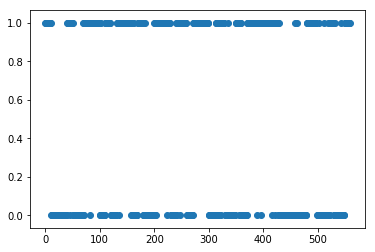

In [12]:
import matplotlib.pyplot as plt
x = np.array(range(560))
y = forcase_end
plt.scatter(x, y)
plt.show()

In [13]:
flag=[]
i = 0
t = 0
while i < 560:
    if forcase_end[i] == 1 :
        t = t + 1
    if i % 10 == 0 :
        if t > 5 :
            flag.append(1)
        else :
            flag.append(0)
        t = 0
    i = i + 1 

print(flag[1:])

[1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]


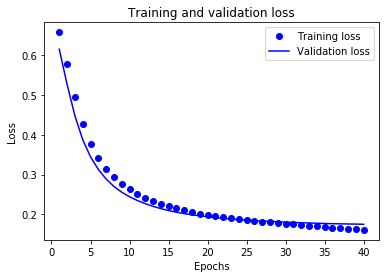

In [14]:

%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

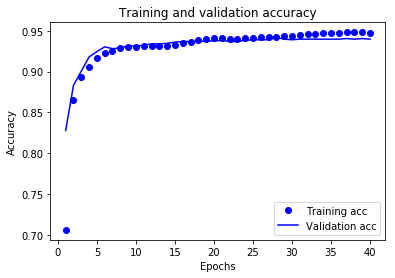

In [15]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()